# Prediction The Client Subscribe a Term Deposit

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Extraction 

In [2]:
bank = pd.read_csv('bank.csv', sep = ';')

In [3]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
bank.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Selection Data 

In [6]:
feature = bank.dtypes[bank.dtypes != 'object'].index
print(feature)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


<AxesSubplot:>

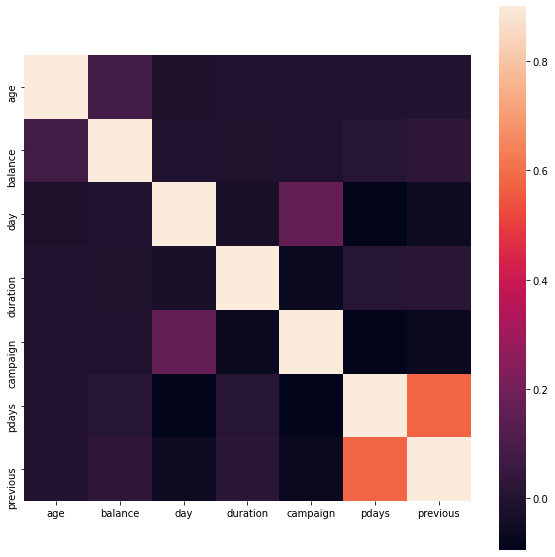

In [7]:
df1 = bank[feature].corr()
plt.figure(figsize=(10,10))
sns.heatmap(df1, vmax = 0.9, square=True)

In [8]:
df2 = bank[['age', 'y']]
df2.head()

age   y
0   30  no
1   33  no
2   35  no
3   30  no
4   59  no

## Transform Data

In [9]:
df2.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [10]:
#term deposit
df2.y[df2.y == 'no'] = 0
df2.y[df2.y == 'yes'] = 1

df2['age'] = df2['age'].astype(float)
df2['y'] = df2['y'].astype(float)
df2.head()

C:\Users\bayu\AppData\Local\Temp/ipykernel_13020/401210070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.y[df2.y == 'no'] = 0
c:\users\bayu\opencv\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\bayu\AppData\Local\Temp/ipykernel_13020/401210070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.y[df2.y == 'yes'] = 1
c:\users\bayu\op

age    y
0  30.0  0.0
1  33.0  0.0
2  35.0  0.0
3  30.0  0.0
4  59.0  0.0

## Support Vector Machine Model

In [11]:
#split data
X = df2.drop('y', axis = 1)
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3164, 1)
(3164,)
(1357, 1)
(1357,)


In [12]:
#generate model
svm = SVC(kernel = 'linear', gamma = 'auto', C = 4)
svm.fit(X_train, y_train)
print(svm)

SVC(C=4, gamma='auto', kernel='linear')


In [13]:
#prediction
prediction = svm.predict(X_test)
print(prediction)

[0. 0. 0. ... 0. 0. 0.]


In [14]:
#accuracy score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.871039056742815
Percentage :  87 %


In [15]:
#confusion matrix
confusion_matrix = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0.0
Actual         
0.0        1182
1.0         175


In [16]:
#classification report
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1182
         1.0       0.00      0.00      0.00       175

    accuracy                           0.87      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.76      0.87      0.81      1357



c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\bayu\opencv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


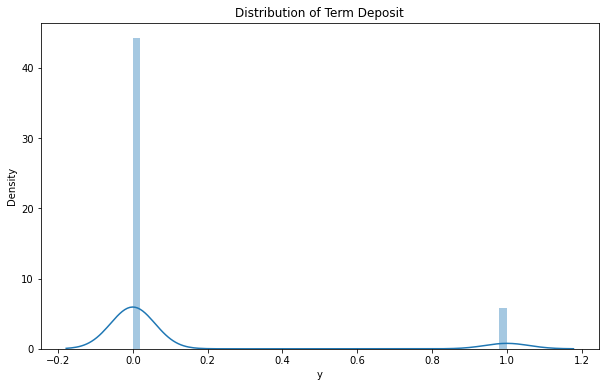

In [17]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df2.y)
plt.title("Distribution of Term Deposit")
plt.show()

age         y
age  1.000000  0.045092
y    0.045092  1.000000

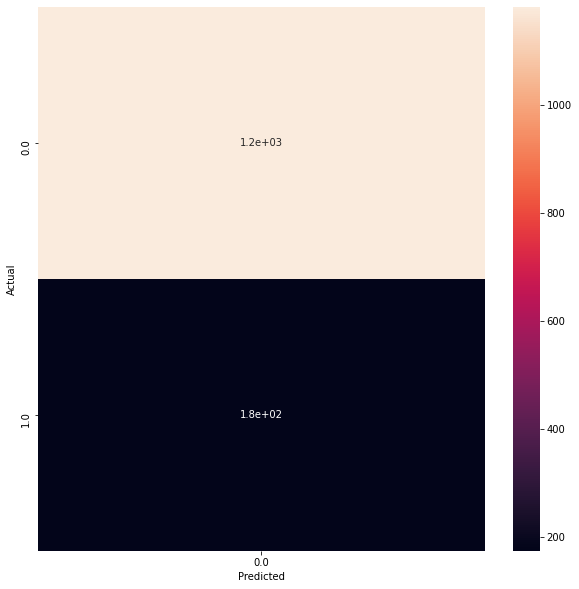

In [18]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True)
df2.corr()

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


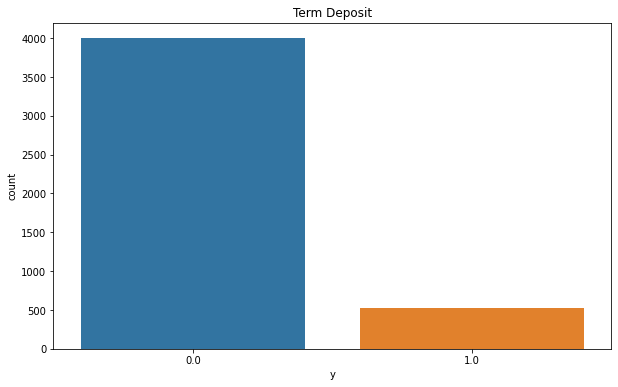

In [19]:
#countplot
plt.figure(figsize=(10,6))
sns.countplot(df2.y)
plt.title("Term Deposit")
plt.show()

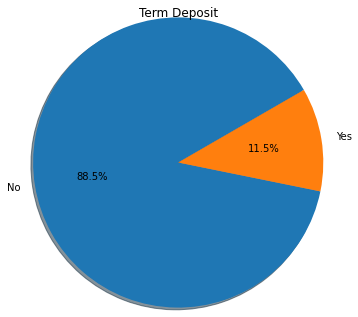

In [20]:
#pie chart
plt.figure(figsize=(5,6))
term = [np.count_nonzero(df2['y'] == 0.0),
       np.count_nonzero(df2['y'] == 1.0)]
activities = ['No', 'Yes']
plt.title("Term Deposit")
plt.pie(term, labels=activities, radius=1.3, startangle=30, autopct='%.1f%%', shadow=True)
plt.show()